# Лабораторная работа 1

Обрабатываемый датасет получен на основе веб-сайта noon, платформы онлайн-шопинга Саудовской Аравии, по категории парфюма.

In [671]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Подготовка данных

In [672]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./noon_perfumes_dataset.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
df.drop_duplicates('name', inplace=True)
df.reset_index(inplace=True)

In [673]:
df

,index,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K
2,2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K
3,3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K
4,4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,951,951,BURBERRY,Body Mini ED,34.0,23.00,5,EDT,Women,Woody,"Sandalwood, Cashmerean, Musk, Amber, Vanilla","Rose, Iris",1.0,Royal Scent,3.5,5
590,962,962,Yves Saint Laurent,Kouros Silver,540.0,190.00,100,EDT,Men,Fruity,Amber and Woody Notes,Sage,4.5,Queen Beauty,3.5,5
591,963,963,Dior,Sauvage Perf,640.0,326.40,100,EDT,Men,Floral,"Tonka Bean, Vanilla and Olibanum",Sandalwood,3.0,Parfume-Stor,4.1,75
592,969,969,GIORGIO ARMANI,Armani Code,514.0,280.10,125,EDT,Men,Citrus,"Leather, Tobacco And Tonka Bean","Star Anise, Olive Blossom And Guaiac Wood",2.0,noon,4.2,98.1K


### Преобразование параметров

In [674]:
# пол
departmentDict = { "Men": 0, "Unisex": 0.5, "Women": 1 }
df['department'] = df['department'].map(lambda elem: departmentDict[elem] if elem != "Kids Unisex" else 0.5)

In [675]:
# цена за 1 мл
df["old_price_1ml"] = df["old_price"] / df["ml"]
df["new_price_1ml"] = df["new_price"] / df["ml"]

In [676]:
# концентрация
concentrationDict = { "EDC": 0, "EDT": 0.25, "PDT": 0.5, "EDP": 0.75, "Oil": 1 } # одеколон, туалетная вода, духи, парфюмированная жидкость, масло
df["concentration"] = df["concentration"].map(lambda elem: concentrationDict[elem])

In [677]:
commaSign = ','

In [678]:
# бренд
brandDf = list(set(df["brand"].map(lambda elem: elem.lower())))
brandDict = {}
cnt = 0
for brandDfItem in brandDf:
    if brandDfItem in brandDict.keys():
        continue
    
    brandDict[brandDfItem] = cnt
    cnt += 1
brandDict


{'emporio armani': 0,
 'j.casanova': 1,
 'kenzo': 2,
 'ferrari': 3,
 'milton lloyd': 4,
 'lattafa': 5,
 'chloe': 6,
 'tesori d´oriente': 7,
 'ming na': 8,
 'tommy hilfiger': 9,
 'benetton': 10,
 'franck olivier': 11,
 'marc jacobs': 12,
 'lolita lempicka': 13,
 'carolina herrera': 14,
 'amouage': 15,
 'valentino': 16,
 'juicy couture': 17,
 'shiseido': 18,
 'cartier': 19,
 'paris hilton': 20,
 'marbert': 21,
 'nikos': 22,
 'burberry': 23,
 'fendi': 24,
 'britney spears': 25,
 'boucheron': 26,
 'chopard': 27,
 'cerruti 1881': 28,
 "penhaligon's": 29,
 'escada': 30,
 'marbert man': 31,
 'dior': 32,
 'azzaro': 33,
 'armani': 34,
 'salvatore ferragamo': 35,
 'jacques bogart': 36,
 'ard al zaafaran': 37,
 'paco rabanne': 38,
 'elizabeth arden': 39,
 'mb': 40,
 'nina ricci': 41,
 'giorgio armani': 42,
 'dorall': 43,
 'coach': 44,
 'jimmy choo': 45,
 's.t.dupont': 46,
 'alina corel': 47,
 'davidoff': 48,
 'armand basi': 49,
 'lancome': 50,
 'genie collection': 51,
 'shirley may': 52,
 'dolce 

In [679]:
df["brand"] = df["brand"].map(lambda elem: brandDict[elem.lower()])

In [680]:
# название
nameDf = list(set(df["name"].map(lambda elem: elem.lower())))
nameDict = {}
cnt = 0
for nameDfItem in nameDf:
    if nameDfItem in nameDict.keys():
        continue
    
    nameDict[nameDfItem] = cnt
    cnt += 1
nameDict


{'gentlemen only': 0,
 'rive gauche homme': 1,
 'bamboo': 2,
 'passenger': 3,
 'body': 4,
 'sauvage perf': 5,
 'rush 2': 6,
 'chloe': 7,
 '5th avenue': 8,
 "jeu d'amour l'elixir": 9,
 'vivaldi': 10,
 'gold secret': 11,
 'patchouli intense': 12,
 'l.12.12 blanc-pure': 13,
 'boss orange': 14,
 'allure sensuelle': 15,
 'declaration essence': 16,
 'l.12.12 rouge': 17,
 'femme': 18,
 'debut': 19,
 'alf laila o laila': 20,
 'creation': 21,
 'oud 24 hours': 22,
 'mini collection no.1075': 23,
 'man in red': 24,
 'dahlia divin nude': 25,
 'man pure': 26,
 'joy of pink': 27,
 'london': 28,
 'girl of now': 29,
 'quatre': 30,
 'hatem': 31,
 'xeryus rouge': 32,
 'for women edp natural sp': 33,
 "l'acquarossa": 34,
 'brit rhythm': 35,
 'eternally hot': 36,
 'pour femme': 37,
 'rouat al oud': 38,
 'tool box': 39,
 'si passione edp for wo': 40,
 'coach': 41,
 "3 l'imperatrice": 42,
 'mademoiselle ricci': 43,
 'musk cologne sp': 44,
 'pour homme': 45,
 'monsieur intense gold': 46,
 'grey flannel for m

In [681]:
df["name"] = df["name"].map(lambda elem: nameDict[elem.lower()])

In [682]:
# лидирующая нота
smellDf = list(set(df["scents"].map(lambda elem: elem
                                       .lower()
                                       .replace(', ', commaSign)
                                       .replace(' and ', commaSign))))
smellDict = {}
cnt = 0
for smellDfItem in smellDf:
    smellSplit = smellDfItem.split(commaSign)
    for smellSplitItem in smellSplit:
        if smellSplitItem in smellDict.keys():
            continue
        
        smellDict[smellSplitItem] = cnt
        cnt += 1
smellDict


{'floral': 0,
 'vanilla': 1,
 'sandalwood': 2,
 'fruity': 3,
 'aromatic': 4,
 'jasmine': 5,
 'woody': 6,
 'musk': 7,
 'spicy': 8,
 'oriental': 9,
 'fresh': 10,
 'sweet aromatic': 11,
 'citrus': 12,
 'rose': 13,
 'arabian': 14,
 'musky': 15,
 'sweet': 16}

In [683]:
df["scents"] = df["scents"].map(lambda elem: elem
                                .lower()
                                .replace(', ', commaSign)
                                .replace(' and ', commaSign)
                                .split(commaSign))
df["scents"] = df["scents"].map(lambda elem: [smellDict[elemItem] for elemItem in elem])

In [684]:
# базовые ноты
baseDf = list(set(df["base_note"].map(lambda elem: elem
                                       .lower()
                                       .replace(', ', commaSign)
                                       .replace(' and ', commaSign))))
baseDict = {}
cnt = 0
for baseDfItem in baseDf:
    baseSplit = baseDfItem.split(commaSign)
    for baseSplitItem in baseSplit:
        if baseSplitItem in baseDict.keys():
            continue
        
        baseDict[baseSplitItem] = cnt
        cnt += 1
baseDict

{'musk': 0,
 'moss': 1,
 'sandalwood': 2,
 'cedar': 3,
 'vetiver': 4,
 'vanilla': 5,
 'suede musk sandalwood cashmeran': 6,
 'white musk': 7,
 'amber': 8,
 'sugar': 9,
 'benzoin': 10,
 'cedarwood': 11,
 'wood': 12,
 'birch': 13,
 'guaiac wood': 14,
 'woodsy notes': 15,
 'virginia cedar': 16,
 'leather': 17,
 'tobacco': 18,
 'tonka bean': 19,
 'plants': 20,
 'red woods': 21,
 'patchouli': 22,
 'roots': 23,
 'oak moss': 24,
 'nutmeg': 25,
 'clove': 26,
 'cinnamon': 27,
 'anise': 28,
 'civet': 29,
 'oakmoss vetiver': 30,
 'sensual addiction of the tonka bean note': 31,
 'frankincense': 32,
 'tahitian vetiver': 33,
 'ambroxan': 34,
 'white cedar extract': 35,
 'woody': 36,
 'agarwood': 37,
 'ambergris': 38,
 'tail rose': 39,
 'cypress': 40,
 'cashmere wood': 41,
 'amber wood': 42,
 'vetiver ': 43,
 'lemon tree': 44,
 'oakmoss': 45,
 'milk': 46,
 'cardamom': 47,
 'agarwood smoke': 48,
 'woody notes': 49,
 'gardenia': 50,
 'pearl musk': 51,
 'and patchouli': 52,
 'aromatic scents': 53,
 'lab

In [685]:
df["base_note"] = df["base_note"].map(lambda elem: elem
                                .lower()
                                .replace(', ', commaSign)
                                .replace(' and ', commaSign)
                                .split(commaSign))
df["base_note"] = df["base_note"].map(lambda elem: [baseDict[elemItem] for elemItem in elem])

In [686]:
# средние ноты
middleDf = list(set(df["middle_note"].map(lambda elem: elem
                                       .lower()
                                       .replace(', ', commaSign)
                                       .replace(' and ', commaSign))))
middleDict = {}
cnt = 0
for middleDfItem in middleDf:
    middleSplit = middleDfItem.split(commaSign)
    for middleSplitItem in middleSplit:
        if middleSplitItem in middleDict.keys():
            continue
        
        middleDict[middleSplitItem] = cnt
        cnt += 1
middleDict


{'carnation': 0,
 'rose': 1,
 'peach': 2,
 'lily of the valley': 3,
 'jasmine': 4,
 'cloves': 5,
 'ambroxan': 6,
 'black pepper': 7,
 'papyrus': 8,
 'patchouli': 9,
 'violet leaves': 10,
 'violet': 11,
 'coriander': 12,
 'small coconut': 13,
 'sea notes': 14,
 'freesia': 15,
 'flower of love': 16,
 'magnolia': 17,
 'iris': 18,
 'green leaves': 19,
 'basil': 20,
 'caraway': 21,
 'heliotrope': 22,
 'lily-of-the-valley': 23,
 'almond blossom': 24,
 'vanilla': 25,
 'sandalwood': 26,
 'ginger': 27,
 'cinnamon': 28,
 'geranium': 29,
 'tuberose': 30,
 'lotus': 31,
 'intoxicating seductress rose': 32,
 'vetiver': 33,
 'cypress': 34,
 'bulgarian rose': 35,
 'woody notes': 36,
 'sweet napolitano cake': 37,
 'verbena': 38,
 'jacaranda wood': 39,
 'grapefruit blossom': 40,
 'luxurious notes of whiskey': 41,
 'chrysanthemum': 42,
 'reseda': 43,
 'ylang-ylang': 44,
 'orange blossom': 45,
 'spicy notes of carnation': 46,
 'nutmeg': 47,
 'thyme': 48,
 'fir tree': 49,
 'marigold': 50,
 'bay leaves': 51

In [687]:
df["middle_note"] = df["middle_note"].map(lambda elem: elem
                                .lower()
                                .replace(', ', commaSign)
                                .replace(' and ', commaSign)
                                .split(commaSign))
df["middle_note"] = df["middle_note"].map(lambda elem: [middleDict[elemItem] for elemItem in elem])

In [688]:
del df["old_price"]
del df["new_price"]
del df["ml"]
del df["seller_rating"]
del df["num_seller_ratings"]
del df["seller"]
del df["Unnamed: 0"]

In [689]:
df

,index,brand,name,concentration,department,scents,base_note,middle_note,item_rating,old_price_1ml,new_price_1ml
0,0,38,217,0.25,0.0,[6],"[45, 22, 4]","[96, 4, 278, 85, 106]",5.0,3.950,2.445500
1,1,65,299,0.75,1.0,[0],"[5, 2, 22]","[88, 397]",4.8,8.300,2.159000
2,2,46,409,0.75,0.5,[14],"[170, 171, 172]","[26, 85]",5.0,2.650,1.869000
3,3,100,518,0.25,0.0,[8],"[41, 1, 80]","[490, 29]",3.0,2.900,1.032000
4,4,65,93,0.75,1.0,[14],"[61, 10, 19]",[141],4.8,5.200,1.899000
...,...,...,...,...,...,...,...,...,...,...,...
589,951,23,488,0.25,1.0,[6],"[2, 235, 0, 8, 5]","[1, 18]",1.0,6.800,4.600000
590,962,139,491,0.25,0.0,[3],"[8, 49]",[69],4.5,5.400,1.900000
591,963,32,5,0.25,0.0,[0],"[19, 5, 120]",[26],3.0,6.400,3.264000
592,969,42,256,0.25,0.0,[12],"[17, 18, 19]","[232, 233, 234]",2.0,4.112,2.240800


## Кластеризация, снижение размерности пространства признаков

### Общая визуализация данных

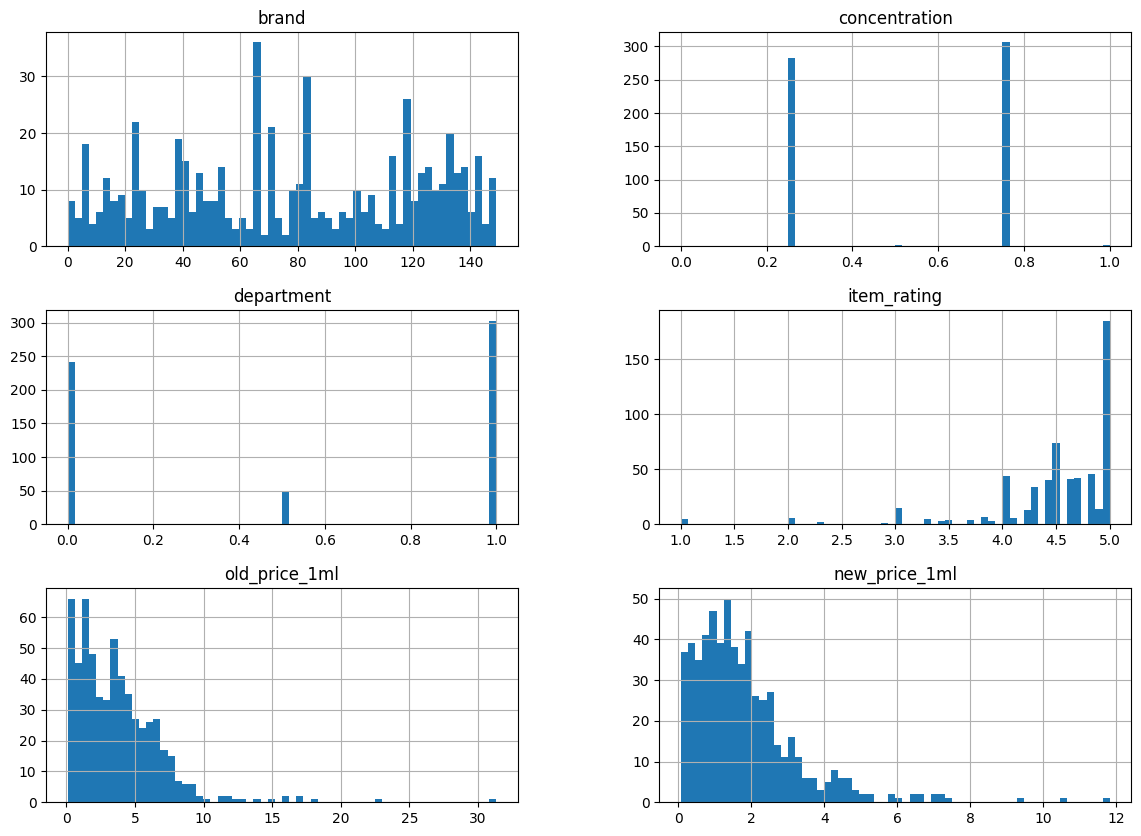

In [690]:
df.drop(['index', 'name'], axis=1).hist(bins=60, figsize=(14,10), grid=True)
plt.show()

### Тепловая карта

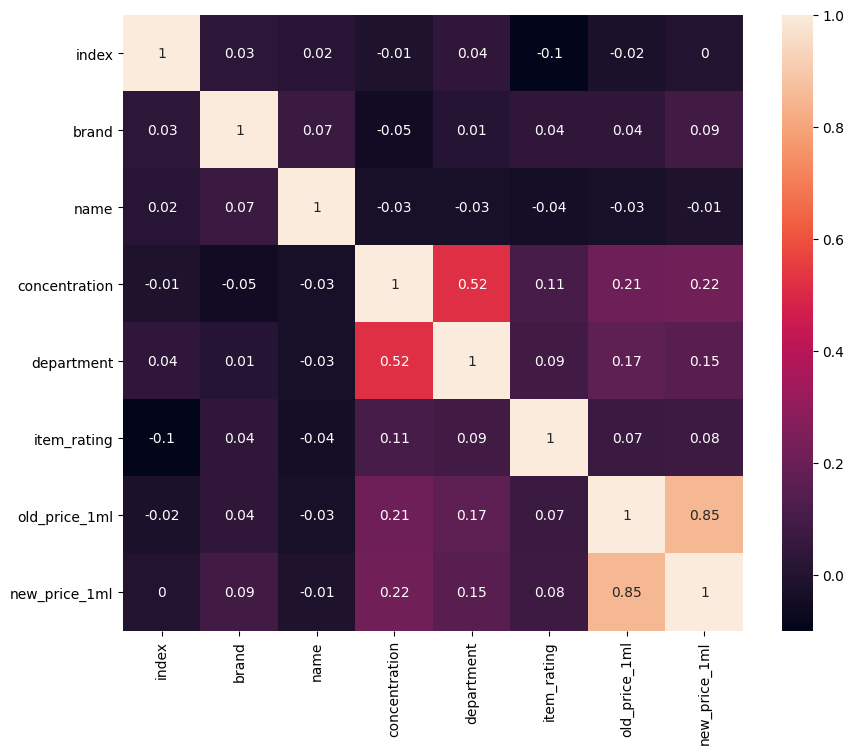

In [691]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(decimals=2), annot=True)
plt.show()
# имеет место обратная корреляция

TypeError: unhashable type: 'list'

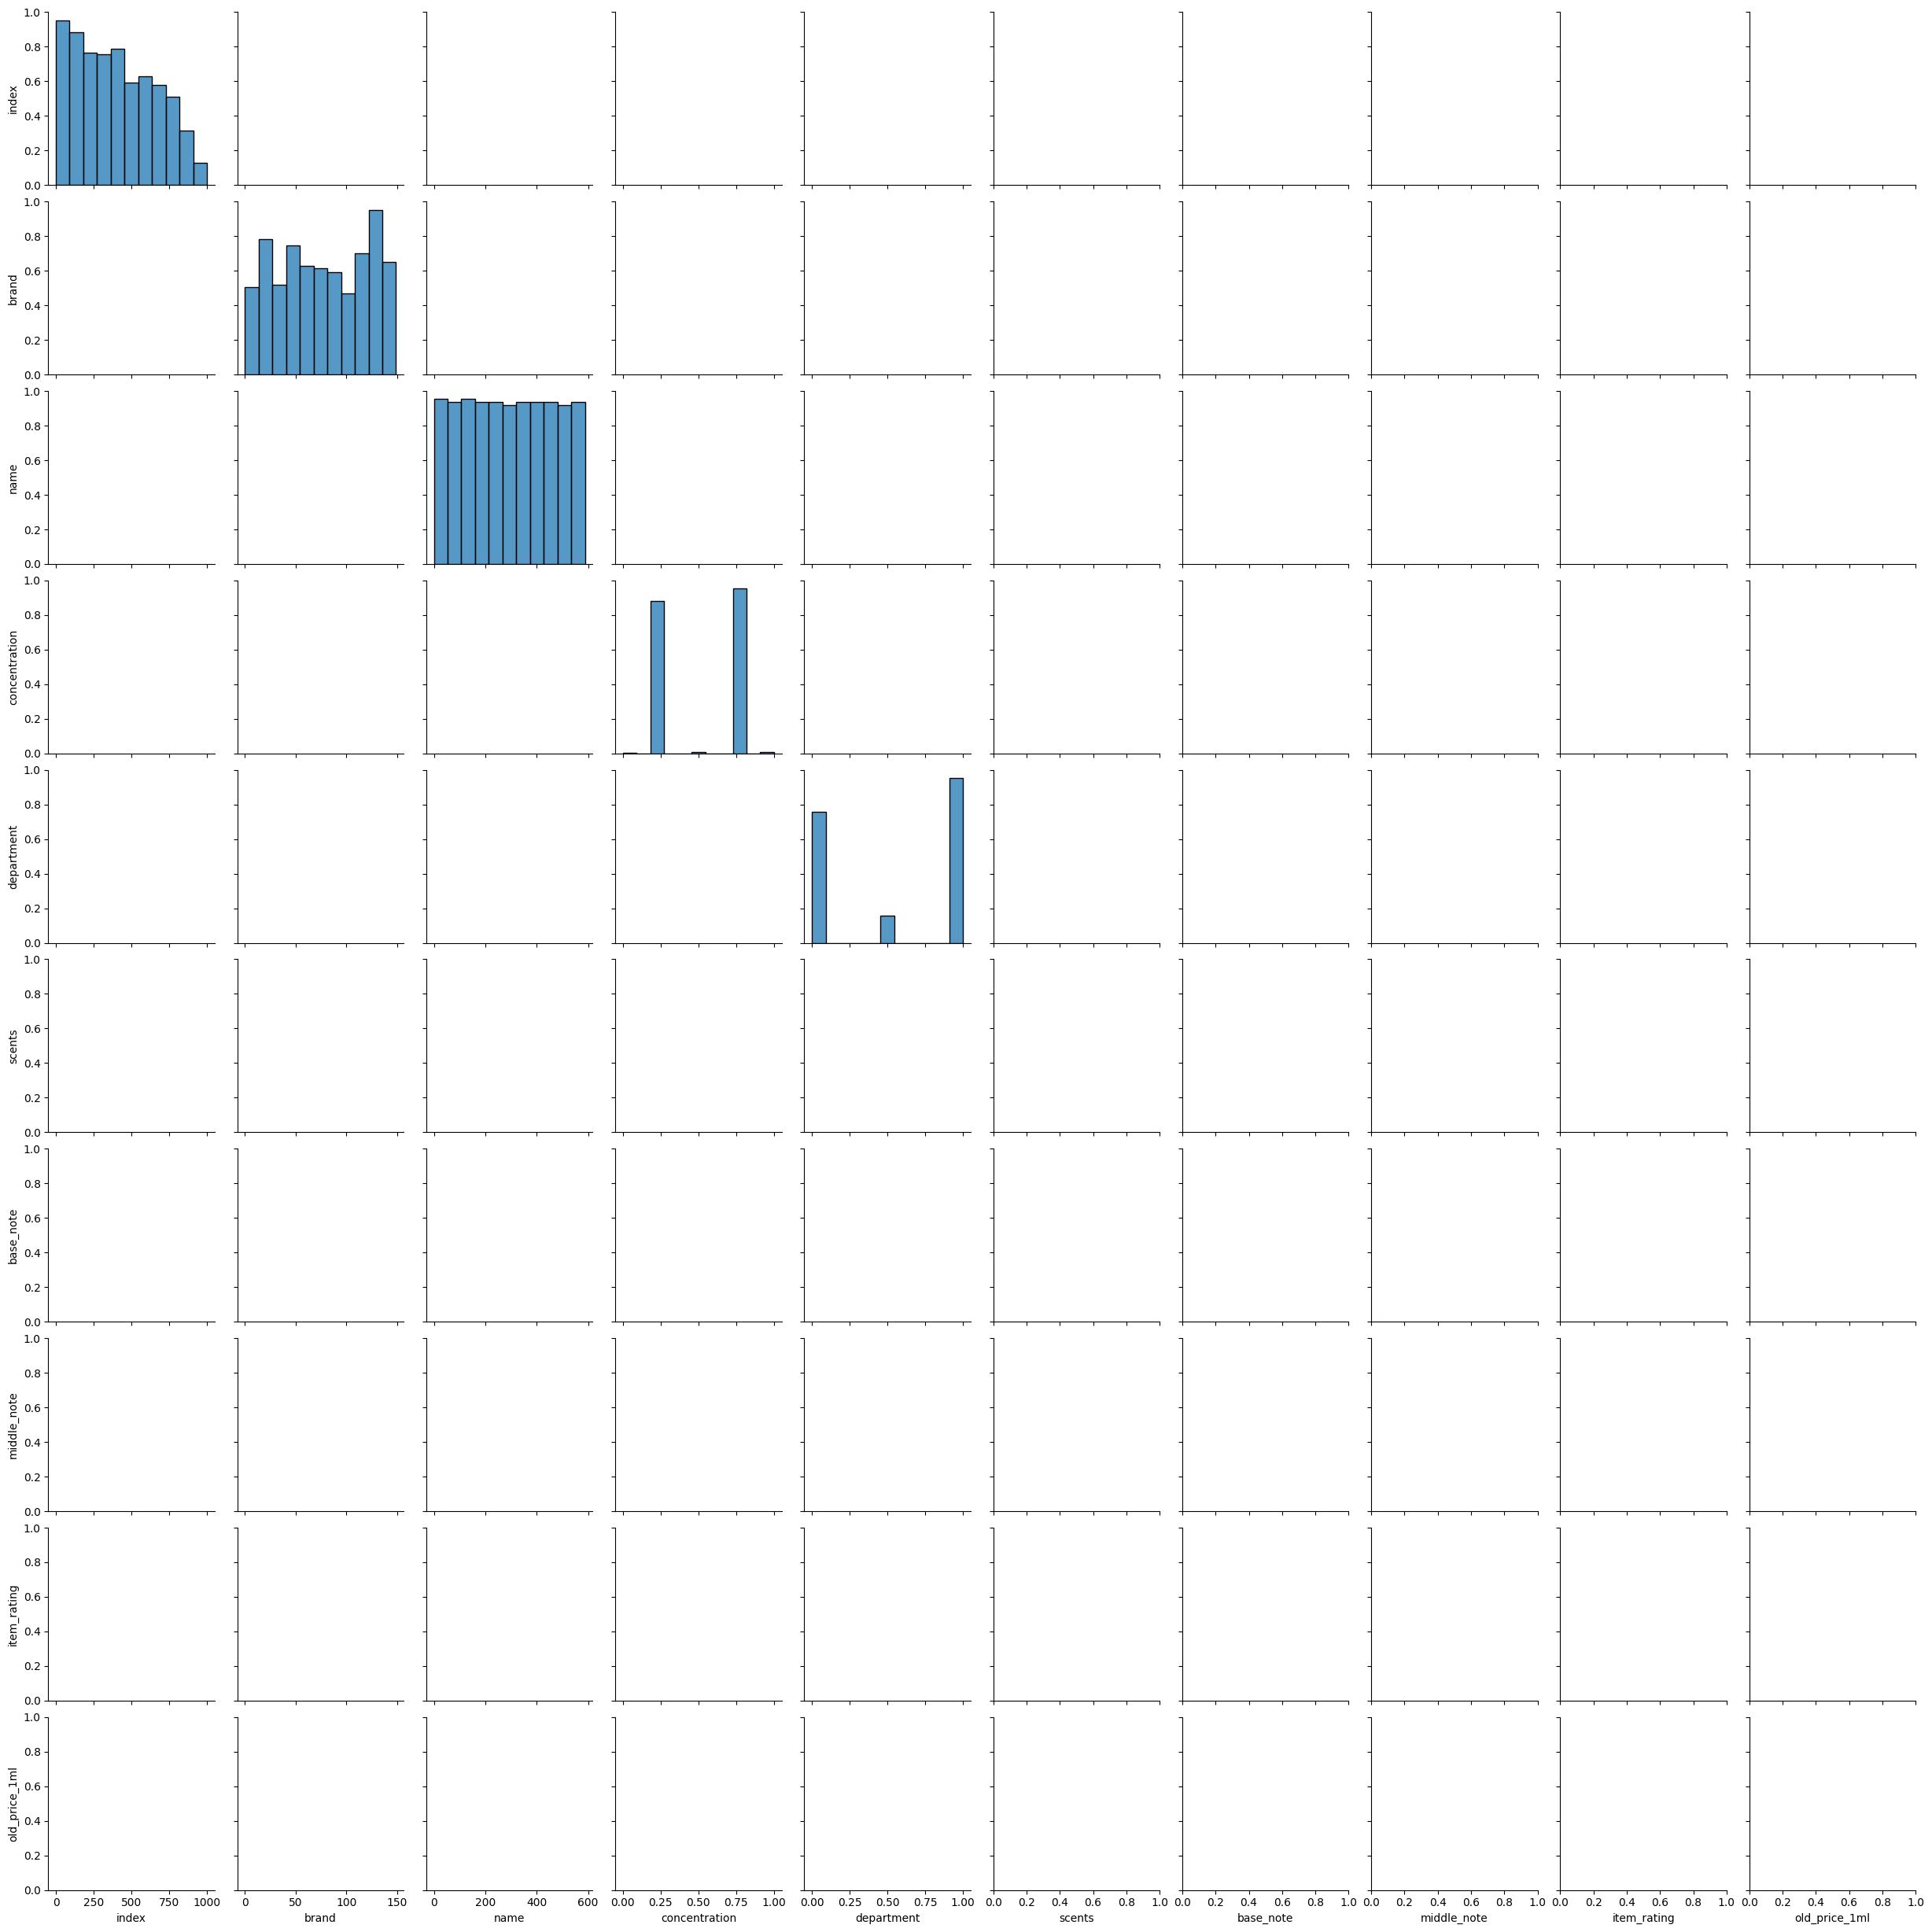

In [692]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(df, kind='reg', vars=df.columns[:-1], plot_kws=plot_kws)
plt.show()